In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
train.shape

(8523, 12)

In [3]:
test = pd.read_csv("Test.csv")
test.shape

(5681, 11)

In [4]:
train["source"] = "train"
test["source"] = "test"

In [5]:
data = pd.concat([train,test], ignore_index=True)
data.shape

C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(14204, 13)

In [6]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

In [7]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train



# Data Exploration

In [8]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


**Some observations:**

1. Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the    visibility cannot be 0.


2. Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them    to how old the particular store is, it should have a better impact on sales.


3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). 
Another thing that should catch attention is that Item_Type has 16 unique values. 
Let’s explore further using the frequency of different categories in each nominal variable. 
I’ll exclude the ID variables for obvious reasons.

## Getting Categorical Variables

In [10]:
categorical_columns = data.select_dtypes(include=[np.object])
categorical_columns.head(2)

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,Dairy,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,Soft Drinks,OUT018,Tier 3,Medium,Supermarket Type2,train


In [11]:
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())      #Return a Series containing counts of unique values in the DataFrame ~ value_counts


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Identifier
DRZ24    10
FDU45    10
FDH31    10
FDH10    10
FDZ40    10
NCW29    10
NCR53    10
FDL58    10
FDA52    10
FDR31    10
DRH03    10
FDD14    10
FDT11    10
FDV52    10
FDH40    10
FDX46    10
FDX22    10
NCW42    10
FDY40    10
FDM39    10
DRK13    10
FDA50    10
NCK29    10
NCC31    10
FDL38    10
FDD05    10
FDB03    10
FDL13    10
DRK35    10
NCE43    10
         ..
FDV13     8
NCQ50     8
FDD44     8
FDZ31     8
FDL24     8
FDU09     8
FDP60     8
NCS17     8
FDX34     8
FDH09     8
FDT48     8
FDY44     8
NCR06     8
NCV30     8
NCD07     8
FDE52     8
FDD50     8
NCL42     7
FDR51     7
FDM50     7
FDL50     7
FDH58     7
FDO33     7
NCW54     7
DRN11     7
FDM52     7
FDM10     7
FDX49     7
FDS22     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: 

**The output gives us following observations:**

1. Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.


2. Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.


3. Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [12]:
data["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Detecting and Treating Null Values

In [13]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.



In [14]:
avg_item_weight = data["Item_Weight"].mean()
avg_item_weight

12.792854228644991

In [15]:
data["Item_Weight"].fillna(avg_item_weight, inplace=True)

In [16]:
data["Item_Weight"].isnull().sum()

0

In [17]:
data["Item_Weight"].describe()

count    14204.000000
mean        12.792854
std          4.234226
min          4.555000
25%          9.300000
50%         12.792854
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [18]:
from scipy.stats import mode

outlet_size_mode = data["Outlet_Size"].mode()[0]
outlet_size_mode

'Medium'

In [19]:
data["Outlet_Size"].fillna(outlet_size_mode, inplace=True)

In [20]:
data["Outlet_Size"].isnull().sum()

0

In [21]:
data["Outlet_Size"].describe()

count      14204
unique         3
top       Medium
freq        8671
Name: Outlet_Size, dtype: object

In [22]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

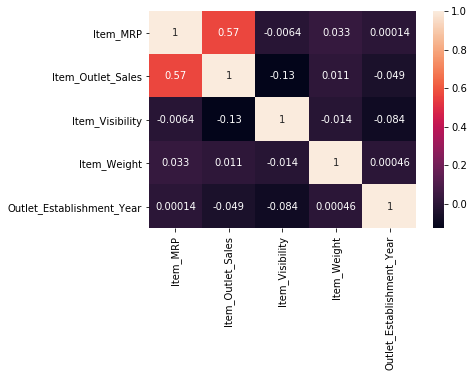

In [23]:
sns.heatmap(data.corr(), annot=True)

# Feature Engineering

## Step 1: Modify Item_Visibility
We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product

In [24]:
item_visibility_avg = data["Item_Visibility"].mean()
item_visibility_avg

0.06595278007399345

In [25]:
zero_value = (data["Item_Visibility"] == 0)
zero_value.sum()

879

In [26]:
data["Item_Visibility"]=data["Item_Visibility"].replace(0, 0.06595278007399345)

In [27]:
zero_value = (data["Item_Visibility"] == 0)
zero_value.sum()

0

In [28]:
data["Item_Visibility"].describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

## Step 2: Create a broad category of Type of Item
Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [29]:
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [30]:
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({"FD" : "Food",
                                                             "NC" : "Non-Consumable",
                                                             "DR" : "Drinks"})
data["Item_Type_Combined"].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [31]:
data.shape

(14204, 14)

In [32]:
data.drop("Item_Type", axis=1, inplace=True)
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks


In [33]:
data.shape

(14204, 13)

## Step 3: Determine the years of operation of a store
We wanted to make a new column depicting the years of operation of a store. This can be done as

In [34]:
data["Outlet_Years"] = 2013 - data["Outlet_Establishment_Year"]
data["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [35]:
data.shape

(14204, 14)

In [36]:
data.drop("Outlet_Establishment_Year", axis=1, inplace=True)
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4


In [37]:
data.shape

(14204, 13)

## Step 4: Modify categories of Item_Fat_Content
We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as

In [38]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [39]:
data["Item_Fat_Content"].replace({"LF" : "Low Fat",
                                  "low fat" : "Low Fat",
                                  "reg" : "Regular"}, inplace=True)


In [40]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Now it makes more sense. But hang on, in step 4 we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [41]:
data.loc[data["Item_Type_Combined"] == "Non-Consumable","Item_Fat_Content"] = "Non-Edible"
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## Step 5: Numerical and One-Hot Encoding of Categorical variables
Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
data["Outlet"] = le.fit_transform(data["Outlet_Identifier"])
data["Outlet"].value_counts()

5    1559
1    1553
6    1550
9    1550
8    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet, dtype: int64

In [44]:
data.shape

(14204, 14)

In [45]:
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14,9
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4,3


In [46]:
data.drop("Outlet_Identifier", axis=1, inplace=True)
data.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,Low Fat,FDA15,249.8092,3735.1380,0.016047,9.30,Tier 1,Medium,Supermarket Type1,train,Food,14,9
1,Regular,DRC01,48.2692,443.4228,0.019278,5.92,Tier 3,Medium,Supermarket Type2,train,Drinks,4,3


In [47]:
data.shape

(14204, 13)

In [48]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])
data[i].value_counts()

5    1559
1    1553
6    1550
9    1550
8    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet, dtype: int64

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [49]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])

In [50]:
data.head(2)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,train,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,train,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [51]:
data.shape

(14204, 33)

In [52]:
data.dtypes

Item_Identifier            object
Item_MRP                  float64
Item_Outlet_Sales         float64
Item_Visibility           float64
Item_Weight               float64
source                     object
Outlet_Years                int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Item_Type_Combined_0        uint8
Item_Type_Combined_1        uint8
Item_Type_Combined_2        uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6      

In [53]:
data.drop(["Item_Fat_Content_0", "Outlet_Location_Type_0", "Outlet_Size_0", "Item_Type_Combined_0", "Outlet_Type_0", "Outlet_0"], axis=1, inplace=True)
data.shape

(14204, 27)

In [54]:
data.head(2)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,...,Outlet_Type_3,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,train,14,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,train,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Step 6: Exporting Data
Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code

In [55]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [56]:
test.drop(["Item_Outlet_Sales", "source"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)

C:\Users\Saurabh\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [58]:
train.head(2)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_Type_3,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,4,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [59]:
test.head(2)

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Outlet_Type_3,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,107.8622,0.007565,20.75,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,87.3198,0.038428,8.30,6,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [60]:
data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'source', 'Outlet_Years', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_1', 'Outlet_Size_2',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [61]:
X_train = train.drop(["Item_Outlet_Sales", "Item_Identifier"], axis=1)
X_test = test.drop(["Item_Identifier"], axis=1)
Y_train = train["Item_Outlet_Sales"]

In [62]:
X_train.shape

(8523, 24)

In [63]:
X_test.shape

(5681, 24)

In [64]:
Y_train.shape

(8523,)

# Model Building

## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)

In [66]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [67]:
predictions_1 = lm.predict(X_test)
predictions_1

array([1844.27822302, 1572.70174698, 1875.19300204, ..., 1811.06480461,
       3542.40074966, 1267.59145545])

In [68]:
accuracy_1 = round(lm.score(X_train, Y_train)*100)
accuracy_1

56.0

## Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()

In [70]:
classifier.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [71]:
predictions_2 = classifier.predict(X_test)
predictions_2

array([1186.4556, 1593.9252, 1775.6886, ..., 1946.7992, 3165.879 ,
       1649.8524])

In [72]:
accuracy_2 = round(classifier.score(X_train, Y_train)*100)
accuracy_2

100.0

## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [74]:
rf.fit(X_train, Y_train)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
predictions_3 = rf.predict(X_test)
predictions_3

array([1450.17898, 1263.08918, 1089.98118, ..., 1325.40806, 4050.3943 ,
       1610.70336])

In [76]:
accuracy_3 = round(rf.score(X_train, Y_train)*100)
accuracy_3

92.0

## XG Boost

In [77]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [78]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [79]:
predictions_4 = model.predict(X_test)
predictions_4

array([1609.9819 , 1486.1848 ,  687.56415, ..., 1763.7507 , 3536.318  ,
       1344.925  ], dtype=float32)

In [80]:
accuracy_4 = round(model.score(X_train, Y_train)*100)
accuracy_4

82.0